In [1]:
import kdezero
import kdezero.functions as F
from kdezero.models import MLP
import numpy as np

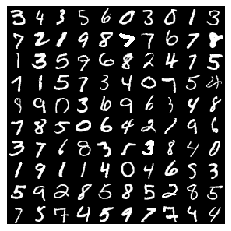

In [2]:
train_set = kdezero.datasets.MNIST(train=True)
train_set.show()

In [3]:
test_set = kdezero.datasets.MNIST(train=False)
print(len(train_set))
print(len(test_set))

60000
10000


In [4]:
batch_size = 100
train_loader = kdezero.DataLoader(train_set, batch_size)
test_loader = kdezero.DataLoader(test_set, batch_size, shuffle=False)

In [5]:
hidden_size = 1000

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = kdezero.optimizers.Adam()
optimizer.add_hook(kdezero.optimizers.WeightDecay(1e-4))

In [6]:
model.compile(acc=F.accuracy, optimizer=optimizer)

In [7]:
history = model.fit_generator(train_loader, val_loader=test_loader, max_epoch=5, gpu=True)

set gpu
epoch: 1
train loss: 0.19061144231197735, accuracy: 0.9423166666666667
val loss: 0.10430251534562558, accuracy: 0.9685
epoch: 2
train loss: 0.07972100945965697, accuracy: 0.9754166666666667
val loss: 0.08561950295290444, accuracy: 0.9722
epoch: 3
train loss: 0.05604032626453166, accuracy: 0.9822833333333333
val loss: 0.07622704694222193, accuracy: 0.978
epoch: 4
train loss: 0.04467834992974531, accuracy: 0.98565
val loss: 0.1085691681940807, accuracy: 0.9677
epoch: 5
train loss: 0.03929111052964193, accuracy: 0.9875666666666667
val loss: 0.0750437596507254, accuracy: 0.979


{'loss': [0.19061144231197735, 0.07972100945965697, 0.05604032626453166, 0.04467834992974531, 0.03929111052964193], 'acc': [0.9423166666666667, 0.9754166666666667, 0.9822833333333333, 0.98565, 0.9875666666666667], 'val_loss': [0.10430251534562558, 0.08561950295290444, 0.07622704694222193, 0.1085691681940807, 0.0750437596507254], 'val_acc': [0.9685, 0.9722, 0.978, 0.9677, 0.979]}
[0.19061144231197735, 0.07972100945965697, 0.05604032626453166, 0.04467834992974531, 0.03929111052964193]
[0.9423166666666667, 0.9754166666666667, 0.9822833333333333, 0.98565, 0.9875666666666667]


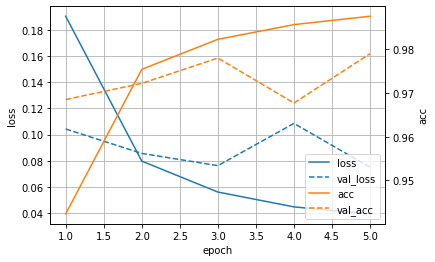

In [8]:
print(history)
print(history.__dict__)
print(history.loss)
print(history.acc)
history.plot('sample.png')

In [9]:
model.evaluate(test_loader)

(0.07725901004072512, 0.9762)

In [8]:
x, t = test_set[0]
x = np.array([x])
x = kdezero.cuda.as_cupy(x)
x.shape

(1, 784)

In [9]:
t = np.array([t])
t = kdezero.cuda.as_cupy(t)
t.shape

(1,)

In [10]:
y = model(x)
print(y)
pred = y.data.argmax(axis=1)
print(pred)
F.accuracy(y, t)

variable([[ -5.01583    -1.3072195  -1.3844296  -0.716638   -6.7418494  -4.6159825
           -10.8920965  11.723397   -4.6179724  -1.267992 ]])
[7]


variable(1.0)

In [11]:
model2 = MLP((hidden_size, hidden_size, 10), activation=F.relu)

In [12]:
model.evaluate(test_loader)

(0.06583379122326732, 0.9788)

In [13]:
test_loader.reset()
for x, t in test_loader:
    print(x.shape, t.shape)
    print(t[0])
    break

(100, 784) (100,)
7


In [14]:
train_loader.reset()
for x, t in train_loader:
    print(x.shape, t.shape)
    print(t)
    break

(100, 784) (100,)
[7 1 5 4 3 1 4 4 6 0 1 2 4 1 3 2 4 3 9 3 4 7 9 9 8 2 9 7 7 1 3 3 3 6 5 6 0
 8 3 6 3 7 3 1 8 1 6 0 0 9 8 3 7 7 0 1 6 0 3 5 3 5 7 4 4 9 9 1 7 3 0 6 2 4
 8 8 7 4 7 1 9 6 9 9 4 3 4 8 6 4 6 5 5 6 1 3 8 5 2 4]
